# Heart disease dataset

Attribute Information:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

In [22]:
import pandas as pd

heart_df =pd.read_csv("./heartdisease.csv")
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Exploring the dataset

In [23]:
print(heart_df.shape,heart_df.info(),heart_df.describe(),sep='\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
(303, 14)
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997 

## Feature extraction

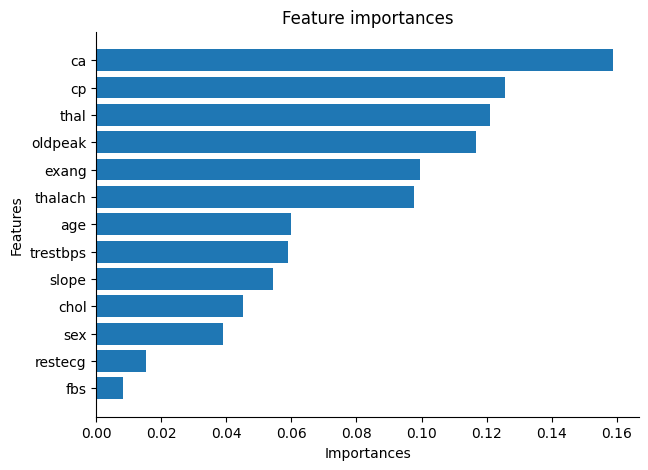

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

X = heart_df.drop("target", axis=1).copy()
y = heart_df["target"]

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

xTrain, xTest, yTrain, yTest = train_test_split(X, y, random_state=42)


rf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
rf.fit(xTrain, yTrain)

imp = rf.feature_importances_
indicies = np.argsort(imp)

plt.figure(figsize=(7, 5))
plt.barh(range(len(indicies)), imp[indicies], align="center")
plt.yticks(range(len(indicies)), X.columns[indicies])
plt.title("Feature importances")
plt.ylabel("Features")
plt.xlabel("Importances")
sns.despine()
plt.show()

[106.97905333  15.87446784 -14.8615748    3.22380835  -0.24199978]


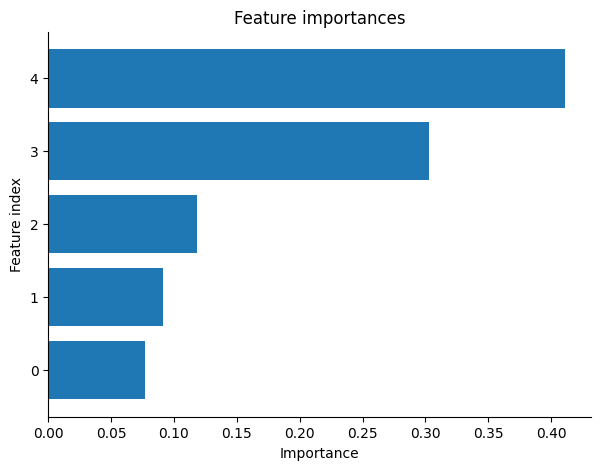

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
print(X_pca[4])

# rf2 = RandomForestClassifier(n_estimators=200,max_depth=5,random_state=42)
rf.fit(X_pca,y)

imp=rf.feature_importances_
indicies=np.argsort(imp)

plt.figure(figsize=(7,5))
plt.barh(range(len(indicies)),imp[indicies],align="center")
plt.title('Feature importances')
sns.despine()
plt.ylabel('Feature index')
plt.xlabel('Importance')
plt.show()

In [32]:
xPruned = X.drop(list(y for x, y in enumerate(X.columns) if imp[x] <= 0.09), axis=1,inplace=False).copy()

xPrunedTrain, xPrunedTest = train_test_split(xPruned, random_state=42)

## Model training

In [34]:
xPcaTrain, xPcaTest = train_test_split(X_pca, random_state=42)

In [35]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, r2_score


models = {
    "RandomForest": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "LogisticRegression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
}

graph_params = {
    "RandomForest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 5, None],
        "random_state": [42],
    },
    "DecisionTree": {"max_depth": [3, 5, None], "random_state": [42]},
    "SVM": {"C": [0.1, 0.5, 1], "kernel": ["linear", "poly", "rbf"]},
    "LogisticRegression": {"max_iter": [4000, 5000, 6000]},
    "KNN": {"n_neighbors": [3, 5, 7]},
}

grid_res = {}
for model in graph_params.keys():
    # Training on the base dataset
    gridBase = GridSearchCV(
        estimator=models[model],
        param_grid=graph_params[model],
        cv=5,
        n_jobs=-1,
        error_score="raise",
        scoring="r2",
    )
    gridBase.fit(xTrain, yTrain)
    bestModel = gridBase.best_estimator_
    yPred = bestModel.predict(xTest)
    acc = accuracy_score(yTest, yPred)
    r2 = r2_score(yTest, yPred)
    grid_res[f"{model} base"] = {
        "Best params": gridBase.best_params_,
        "Accuracy": acc,
        "R2": r2,
    }

    # Training on PCA data
    gridPCA = GridSearchCV(
        estimator=models[model],
        param_grid=graph_params[model],
        cv=5,
        n_jobs=-1,
        error_score="raise",
        scoring="r2",
    )
    gridPCA.fit(xPcaTrain, yTrain)
    bestModel = gridPCA.best_estimator_
    yPred = bestModel.predict(xPcaTest)
    acc = accuracy_score(yTest, yPred)
    r2 = r2_score(yTest, yPred)
    grid_res[f"{model} PCA"] = {
        "Best params": gridPCA.best_params_,
        "Accuracy": acc,
        "R2": r2,
    }

    # Training on pruned dataset
    gridPruned = GridSearchCV(
        estimator=models[model],
        param_grid=graph_params[model],
        cv=5,
        n_jobs=-1,
        error_score="raise",
        scoring="r2",
    )
    gridPruned.fit(xPrunedTrain, yTrain)
    bestModel = gridPruned.best_estimator_
    yPred = bestModel.predict(xPrunedTest)
    acc = accuracy_score(yTest, yPred)
    r2 = r2_score(yTest, yPred)
    grid_res[f"{model} pruned"] = {
        "Best params": gridPruned.best_params_,
        "Accuracy": acc,
        "R2": r2,
    }

pd.DataFrame(grid_res).T

,Best params,Accuracy,R2
RandomForest base,"{'max_depth': 3, 'n_estimators': 200, 'random_...",0.855263,0.417422
RandomForest PCA,"{'max_depth': 3, 'n_estimators': 300, 'random_...",0.828947,0.311498
RandomForest pruned,"{'max_depth': 3, 'n_estimators': 300, 'random_...",0.842105,0.36446
DecisionTree base,"{'max_depth': 3, 'random_state': 42}",0.776316,0.099652
DecisionTree PCA,"{'max_depth': 5, 'random_state': 42}",0.763158,0.04669
DecisionTree pruned,"{'max_depth': 3, 'random_state': 42}",0.802632,0.205575
SVM base,"{'C': 0.1, 'kernel': 'linear'}",0.868421,0.470383
SVM PCA,"{'C': 0.1, 'kernel': 'linear'}",0.855263,0.417422
SVM pruned,"{'C': 1, 'kernel': 'linear'}",0.868421,0.470383
LogisticRegression base,{'max_iter': 4000},0.881579,0.523345
